In [51]:
#import relevant packages and libraies
import os
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [52]:
X = []
y = []
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
base_path = './data/train/'

for i, target in enumerate(classes):
    
    files = os.listdir(base_path+target)
    
    for file in files:
        # load the image
        img = load_img(base_path+target+'/'+file,target_size=(224, 224) )
        # convert it to an array
        img_array = np.array(img)
        
        # append the array to X
        X.append(img_array)
        
        # append the numeric target to y
        y.append(i)  

MemoryError: Unable to allocate 147. KiB for an array with shape (224, 224, 3) and data type uint8

In [3]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [4]:
situations = {
                'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'
}

In [ ]:
X_1 = np.array(X)
y_1= np.array(y)

X.shape

In [ ]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X_2 = X_1[shuffler]
y_2 = y_1[shuffler]

In [50]:
import pickle

binary_x = pickle.dumps(X_2)
binary_y = pickle.dumps(y_2)

file_x = open('X.bin', mode='wb')
file_y = open('y.bin', mode='wb')

file_x.write(binary_x)
file_y.write(binary_y)

file_x.close()
file_y.close()
            


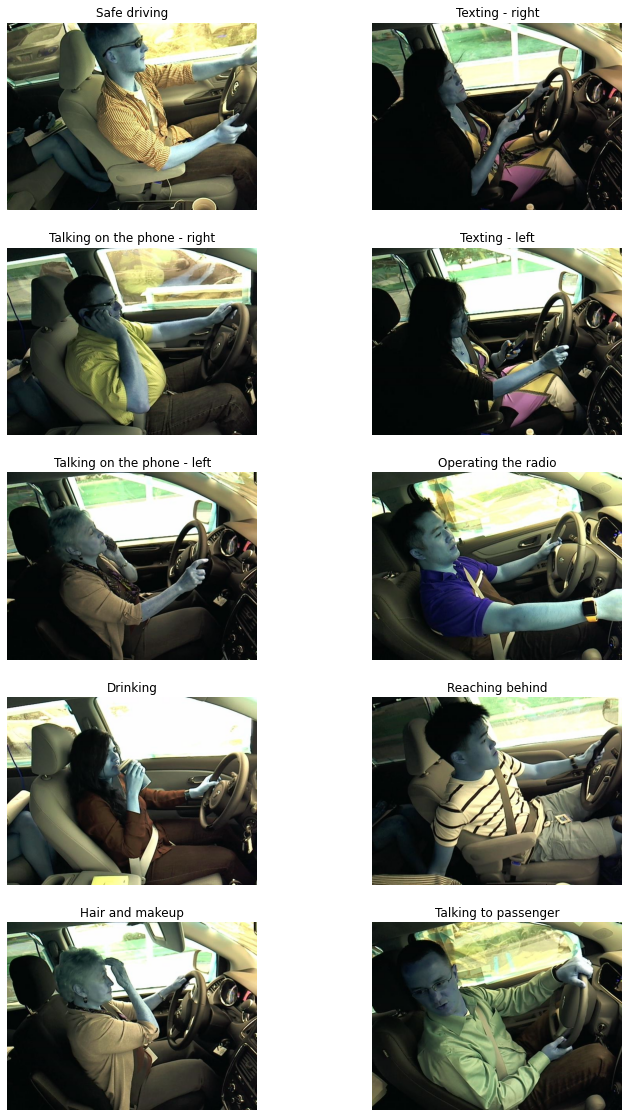

In [8]:
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = './data/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = cv2.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.axis('off')
                plt.title(situations[directory])

In [9]:
# train-test split
from sklearn.model_selection import train_test_split

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.90)

In [10]:
X_train,X_test, y_train, y_test = train_test_split(X_train_sample,y_train_sample, test_size=0.20)

In [11]:
#keep a copy of y test as the actual number labels for further process
y_test_true = y_test.copy()

In [12]:
#one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN Model

In [14]:
#clear session and build model
K.clear_session()

In [15]:
model_cnn_10 = Sequential([
    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Flatten(),
    
    #fully connected layers
    
    Dense(100,activation='relu'),
    
    #batch normalisation
    BatchNormalization(),
    
    #dropout 
    Dropout(0.2),
    
    #output layer
    Dense(10 ,activation= "softmax")

    
])

In [16]:
#check the summary:
model_cnn_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

In [18]:
#define early stopping for fitting
#early_stop = keras.callbacks.EarlyStopping
                                            #monitor='val_loss', 
                                            #min_delta=0.0005, 
                                            #patience=3,
                                            #verbose=1, 
                                            #mode='auto'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [19]:
#compile the model
model_cnn_10.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#fit the model
history = model_cnn_10.fit(X_train, y_train, batch_size=50, epochs=50,validation_split=0.2) #callbacks=[early_stop])

Epoch 1/50
29/29 [==============================] - 87s 3s/step - loss: 1.8600 - accuracy: 0.3891 - val_loss: 4.0728 - val_accuracy: 0.3036
Epoch 2/50
29/29 [==============================] - 93s 3s/step - loss: 0.7785 - accuracy: 0.7685 - val_loss: 1.1893 - val_accuracy: 0.5766
Epoch 3/50
29/29 [==============================] - 92s 3s/step - loss: 0.3122 - accuracy: 0.9372 - val_loss: 0.5408 - val_accuracy: 0.8384
Epoch 4/50
29/29 [==============================] - 85s 3s/step - loss: 0.1410 - accuracy: 0.9895 - val_loss: 0.6099 - val_accuracy: 0.8273
Epoch 5/50
29/29 [==============================] - 116s 4s/step - loss: 0.0771 - accuracy: 0.9958 - val_loss: 0.3217 - val_accuracy: 0.9220
Epoch 6/50
29/29 [==============================] - 106s 4s/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.2772 - val_accuracy: 0.9387
Epoch 7/50
29/29 [==============================] - 106s 4s/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.1932 - val_accuracy: 0.9638
Epoch 8/50
29/29 

# Examine the model

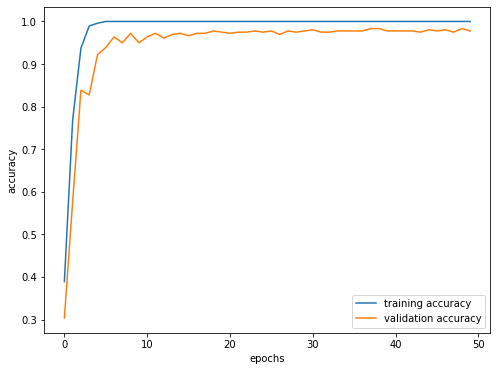

In [21]:
#plot accuracy curve
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


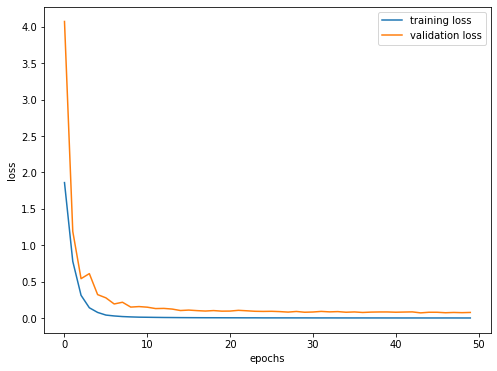

In [22]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [24]:
ypred = model_cnn_10.predict(X_test)

In [25]:
#look at the first prediction
ypred[0]

array([4.19483003e-05, 2.82184483e-04, 6.30658269e-02, 1.73314436e-06,
       9.48392414e-03, 7.41569267e-04, 1.83051132e-04, 1.14250666e-04,
       9.25868332e-01, 2.17173671e-04], dtype=float32)

In [26]:
np.argmax(ypred[0])

8

In [29]:
y_test_true

array([8, 3, 6, 5, 5, 2, 0, 5, 2, 4, 2, 8, 4, 8, 7, 1, 5, 8, 5, 1, 0, 4,
       6, 0, 4, 2, 1, 0, 5, 8, 5, 4, 5, 2, 9, 6, 3, 3, 0, 6, 4, 7, 9, 6,
       8, 2, 5, 9, 7, 7, 3, 2, 2, 7, 9, 0, 0, 2, 4, 9, 3, 5, 5, 9, 3, 3,
       8, 3, 3, 6, 8, 1, 1, 5, 8, 0, 7, 0, 7, 0, 4, 5, 0, 3, 0, 1, 1, 9,
       7, 1, 5, 1, 1, 3, 0, 1, 4, 4, 0, 9, 3, 7, 2, 6, 0, 9, 7, 5, 9, 4,
       4, 9, 3, 0, 7, 0, 3, 6, 7, 1, 4, 0, 8, 8, 1, 7, 1, 0, 6, 2, 6, 5,
       0, 9, 4, 6, 2, 1, 1, 8, 3, 4, 8, 6, 1, 4, 7, 6, 4, 8, 9, 6, 8, 5,
       0, 3, 9, 2, 8, 7, 7, 4, 3, 2, 8, 9, 9, 3, 9, 5, 4, 2, 5, 0, 4, 5,
       4, 4, 1, 1, 3, 7, 7, 3, 9, 7, 3, 0, 2, 3, 4, 9, 7, 3, 4, 3, 4, 4,
       0, 3, 1, 3, 2, 4, 1, 0, 2, 7, 1, 6, 4, 9, 7, 9, 9, 5, 8, 2, 8, 5,
       2, 7, 0, 0, 9, 2, 9, 4, 5, 4, 9, 3, 6, 0, 5, 9, 1, 8, 6, 1, 9, 0,
       3, 3, 6, 2, 2, 6, 0, 7, 3, 9, 3, 1, 3, 2, 1, 9, 9, 8, 9, 0, 0, 6,
       7, 2, 3, 3, 5, 5, 6, 9, 9, 5, 7, 7, 7, 1, 0, 4, 9, 9, 9, 6, 9, 1,
       1, 3, 2, 4, 6, 0, 5, 8, 1, 9, 3, 8, 5, 3, 7,

In [37]:
true_list =[]
for i in range(len(y_test_true)):
    if np.argmax(ypred[i])==y_test_true[i]:
        true_list.append(i)
        
probability = len(true_list) / len(y_test_true)
round(probability,3)

0.971

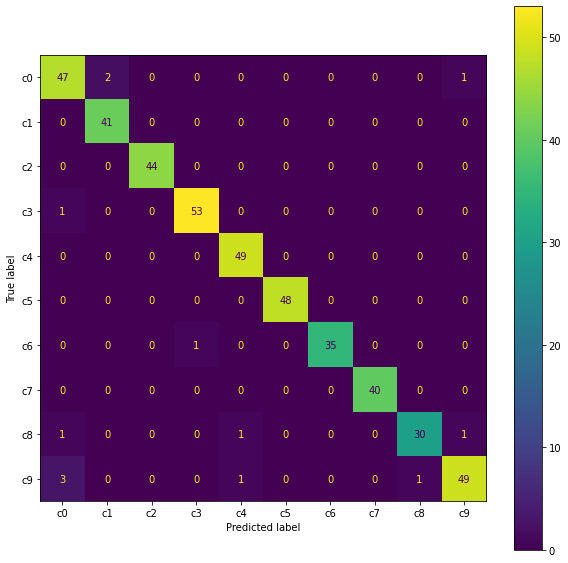

In [39]:
#plot confusion matrix
cm_t = confusion_matrix(y_true=y_test_true, y_pred=np.argmax(ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_t,
                             display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

In [42]:
m = load_model('./models/model_cnn.h5')

In [43]:
ypred_2 = m.predict(X_test)

In [44]:
true_list_2 =[]
for i in range(len(y_test_true)):
    if np.argmax(ypred_2[i])==y_test_true[i]:
        true_list_2.append(i)
        
probability = len(true_list_2) / len(y_test_true)
round(probability,3)

0.998

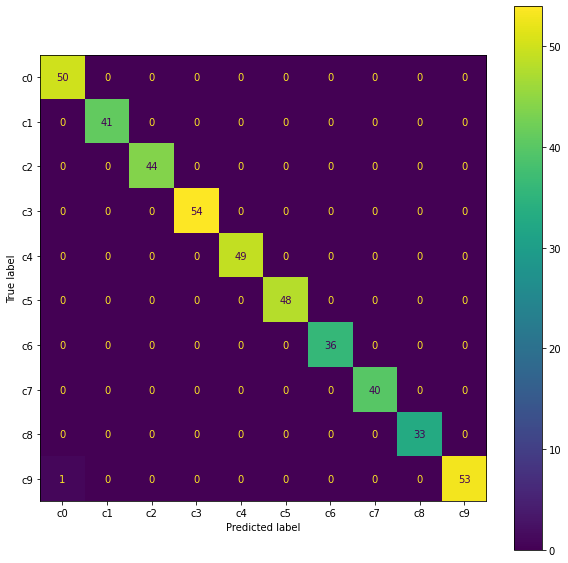

In [45]:
#plot confusion matrix
cm_t_2 = confusion_matrix(y_true=y_test_true, y_pred=np.argmax(ypred_2, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_t_2,
                             display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

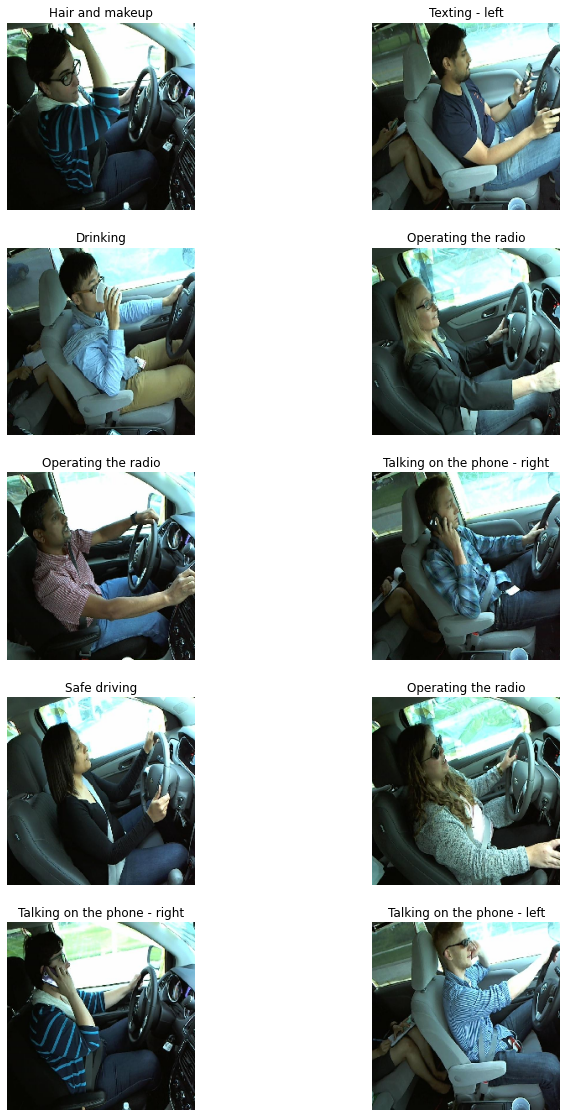

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,20
# have a look at the data
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(situations[classes[np.argmax(ypred[i])]]) 

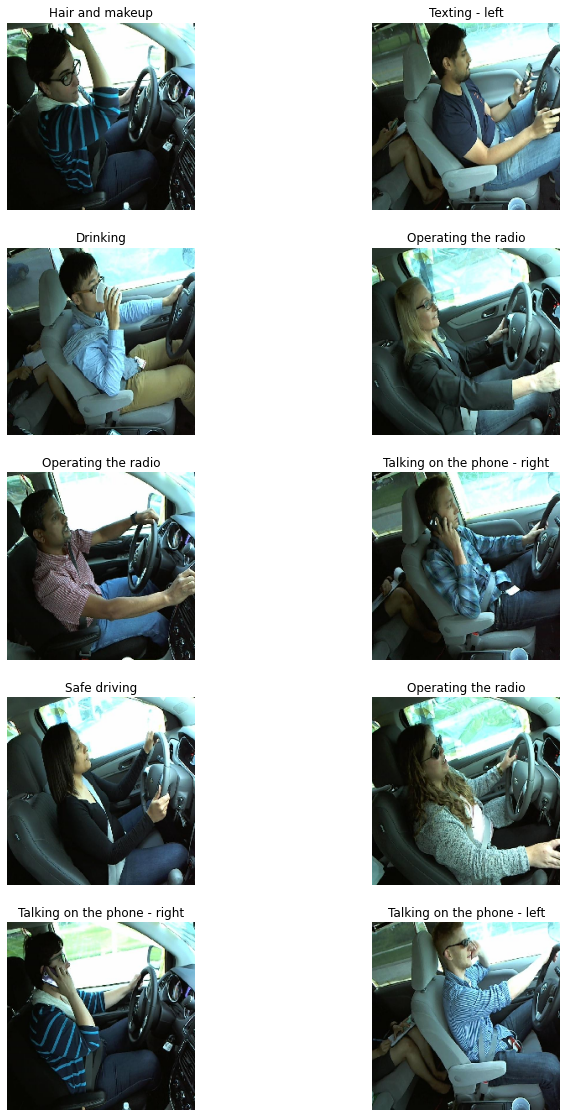

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,20
# have a look at the data
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(situations[classes[np.argmax(ypred_2[i])]]) 

In [28]:
model_cnn_10.save('./models/model_cnn_wtout_lr.h5')

### 